In [1]:
using Revise

In [2]:
using QuantumStates, CompositeStructs

┌ Info: Precompiling QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f]
└ @ Base loading.jl:1662


In [856]:
QN_bounds = (S=1/2, N=0:1)
basis = enumerate_states(TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}, QN_bounds, QN_bounds)
;

In [936]:
H_operator = :(
    B * (Rotation ⊗ I + I ⊗ Rotation) +
    γ * (SpinRotation ⊗ I + I ⊗ SpinRotation) +
    E * (d⁰ ⊗ I + I ⊗ d⁰) +
    s * (SplitMStates ⊗ I + I ⊗ SplitMStates) +
    d * (
        (d⁻ ⊗ d⁺ + d⁺ ⊗ d⁻) / 2 + d⁰ ⊗ d⁰ # q = 0 terms
        -(3/2) * (d⁻ ⊗ d⁻ + d⁺ ⊗ d⁺) # q = ±2 terms
        )
)
parameters = @params begin
    B = 10
    γ = 0.01
    E = 0.
    s = 1e-9
    d = 0.02
end
H = Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time full_evaluate!(H)
@time solve!(H)
;

  0.067456 seconds (242.96 k allocations: 7.494 MiB, 62.04% compilation time: 100% of which was recompilation)
  0.002247 seconds (344 allocations: 335.828 KiB)


In [970]:
i = 15
H.states[i] |> display
H.states[i].E |> display

State{TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}}(19.99833333333331, TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}[TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}(AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, -1/2, (J = 0.5:1.0:0.5, M = -0.5:1.0:0.5)), AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, -1/2, (J = 0.5:1.0:0.5, M = -0.5:1.0:0.5))), TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}(AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, -1/2, (J = 0.5:1.0:0.5, M = -0.5:1.0:0.5)), AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, 1/2, (J = 0.5:1.0:0.5, M = -0.5:1.0:0.5))), TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}(AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, -1/2, (J = 0.5:1.0:0.5, M = -0.5

19.99833333333331

In [975]:
QN_bounds = (S=1/2, N=0:1)
uncoupled_basis = enumerate_states(TensorProductState{AngularMomentumState_withSpinRotation_Uncoupled, AngularMomentumState_withSpinRotation_Uncoupled}, QN_bounds, QN_bounds)
uncoupled_states = convert_basis(H.states, uncoupled_basis)
;

In [976]:
H.states[5]

State{TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}}(19.980379996878856, TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}[TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}(AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, -1/2, (J = 0.5:1.0:0.5, M = -0.5:1.0:0.5)), AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, -1/2, (J = 0.5:1.0:0.5, M = -0.5:1.0:0.5))), TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}(AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, -1/2, (J = 0.5:1.0:0.5, M = -0.5:1.0:0.5)), AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, 1/2, (J = 0.5:1.0:0.5, M = -0.5:1.0:0.5))), TensorProductState{AngularMomentumState_withSpinRotation, AngularMomentumState_withSpinRotation}(AngularMomentumState_withSpinRotation(0.0, 0, 1/2, 1/2, -1/2, (J = 0.5:1.0:0.5, M = -0.

In [977]:
uncoupled_states[5]

State{TensorProductState{AngularMomentumState_withSpinRotation_Uncoupled, AngularMomentumState_withSpinRotation_Uncoupled}}(19.980379996878856, TensorProductState{AngularMomentumState_withSpinRotation_Uncoupled, AngularMomentumState_withSpinRotation_Uncoupled}[TensorProductState{AngularMomentumState_withSpinRotation_Uncoupled, AngularMomentumState_withSpinRotation_Uncoupled}(AngularMomentumState_withSpinRotation_Uncoupled(0.0, 0, 0, 1/2, -1/2, (M_N = 0:0, M_S = -0.5:1.0:0.5)), AngularMomentumState_withSpinRotation_Uncoupled(0.0, 0, 0, 1/2, -1/2, (M_N = 0:0, M_S = -0.5:1.0:0.5))), TensorProductState{AngularMomentumState_withSpinRotation_Uncoupled, AngularMomentumState_withSpinRotation_Uncoupled}(AngularMomentumState_withSpinRotation_Uncoupled(0.0, 0, 0, 1/2, -1/2, (M_N = 0:0, M_S = -0.5:1.0:0.5)), AngularMomentumState_withSpinRotation_Uncoupled(0.0, 0, 0, 1/2, 1/2, (M_N = 0:0, M_S = -0.5:1.0:0.5))), TensorProductState{AngularMomentumState_withSpinRotation_Uncoupled, AngularMomentumState

┌ Warning: G:\My Drive\github\QuantumStates\src is not an existing directory, Revise is not watching
└ @ Revise C:\Users\Christian\.julia\packages\Revise\Kw99o\src\packagedef.jl:574


In [968]:
uncoupled_states[5] |> energy

19.980379996878856

In [940]:
function H_func!(H, scan_values)
    H.parameters.d = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [941]:
rs = (1.5:0.1:8)
ds = 1 ./ rs .^3
;

In [942]:
scan_params = (
    d = ds,
    );
H_scanned = deepcopy(H)
iterator = Iterators.product
@time scan_values, tracked_idxs = scan_parameters(H_scanned, scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=1)
matrix_values = hcat(values(scan_values)...)';
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.306401 seconds (189.51 k allocations: 33.206 MiB, 48.54% compilation time)


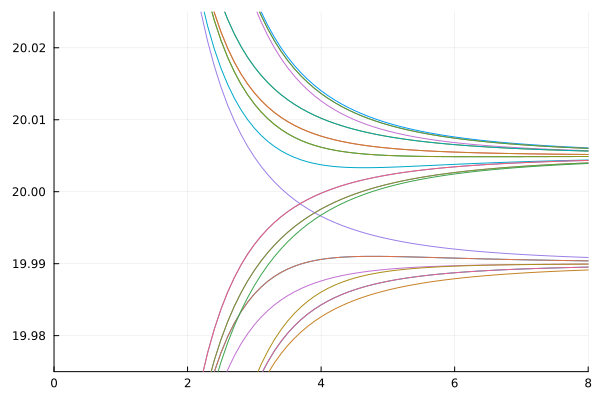

In [943]:
using Plots
γ = H.parameters.γ
B = H.parameters.B
plot(rs, reverse(matrix_values[:,5:28]), legend=nothing)
plot!(xlim=(0,8))
plot!(ylim=((1 - γ/B - γ/4B) * 2B, (1 + γ/B + γ/4B) * 2B))